In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart_disease.csv')

In [3]:
print('Data first 5 rows')
data.head()

Data first 5 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print('Data last 5 rows')
data.tail()

Data last 5 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
#sample; random rows in dataset
data.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0


In [9]:
data = data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol',\
                            'fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang', \
                            'oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [10]:
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [11]:
data.shape

(303, 14)

In [12]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [13]:
data.isnull().values.any()

False

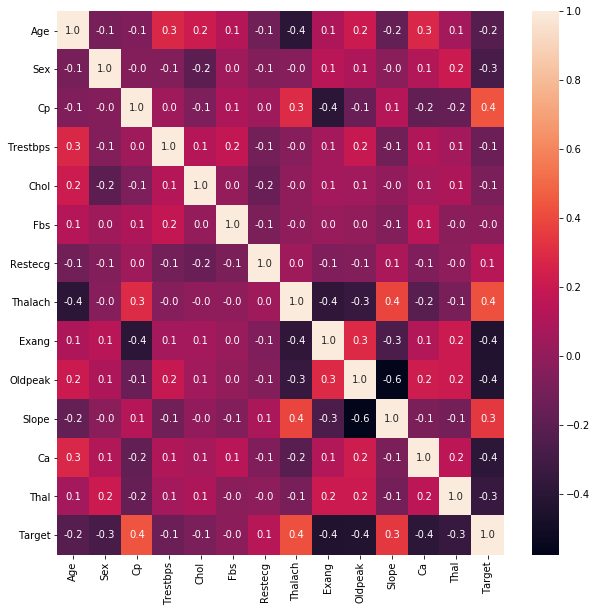

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

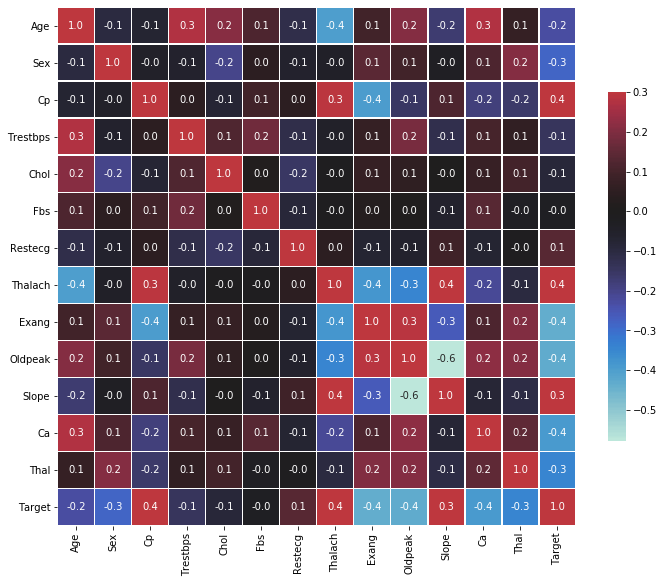

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), square=True, cbar_kws={"shrink": .5}, center=0,vmax=.3, annot=True,linewidth=0.5, \
            fmt='.1f')
plt.tight_layout()
plt.show()

In [16]:
data.Age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

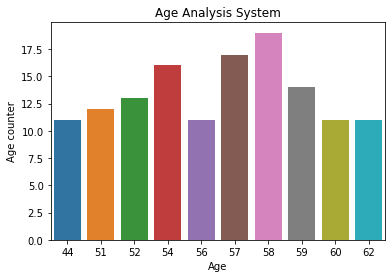

In [17]:
sns.barplot(x = data.Age.value_counts()[:10].index, y = data.Age.value_counts()[:10].values, data=data)
plt.xlabel('Age')
plt.ylabel('Age counter')
plt.title('Age Analysis System')
plt.show()

In [18]:
MinAge = data.Age.min()
MaxAge = data.Age.max()
MeanAge = data.Age.mean()
print('Min age:', MinAge)
print('Max age:', MaxAge)
print('Mean age:', MeanAge)

Min age: 29
Max age: 77
Mean age: 54.366336633663366


In [19]:
young_ages = data[(data.Age>=29) & (data.Age<40)]
middle_ages = data[(data.Age>=40) & (data.Age<50)]
elderly_ages = data[data.Age>=50]
print('Young ages' , len(young_ages))
print('Middle ages' , len(middle_ages))
print('Elderly ages' , len(elderly_ages))

Young ages 16
Middle ages 72
Elderly ages 215


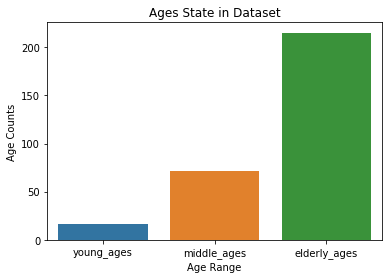

In [20]:
sns.barplot(x = ['young_ages','middle_ages','elderly_ages'], y=[len(young_ages),len(middle_ages),\
                                                               len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [21]:
AgeRange = data['AgeRange'] = 0

In [22]:
youngAge_index = data[(data.Age>=29) & (data.Age<40)].index
middleAge_index = data[(data.Age>=40) & (data.Age<50)].index
elderlyAges_index = data[data.Age>=50].index

In [23]:
for index in youngAge_index:
    data.loc[index, 'AgeRange'] = 0
for index in middleAge_index:
    data.loc[index, 'AgeRange'] = 1
for index in elderlyAges_index:
    data.loc[index, 'AgeRange'] = 2



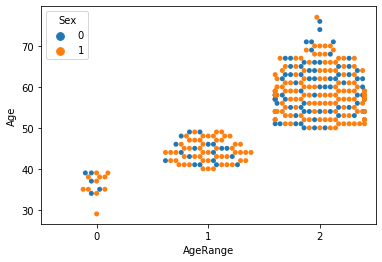

In [24]:
sns.swarmplot(x= 'AgeRange', y = 'Age', hue='Sex', data=data)

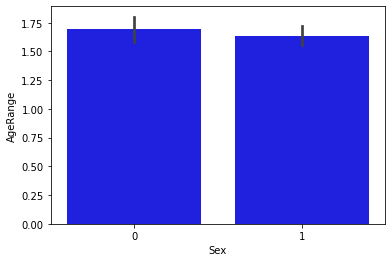

In [25]:
sns.barplot(x='Sex', y = 'AgeRange', data=data, color='blue')
plt.show()

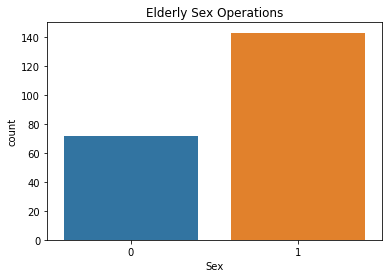

In [26]:
sns.countplot(elderly_ages.Sex)
plt.title("Elderly Sex Operations")
plt.show()

In [27]:
elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum')

Sex
0    10625
1    20501
Name: Thalach, dtype: int64

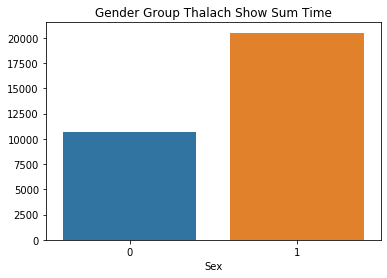

In [28]:
sns.barplot(x = elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').index, \
            y=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').values,\
           )
plt.title("Gender Group Thalach Show Sum Time")
plt.show()

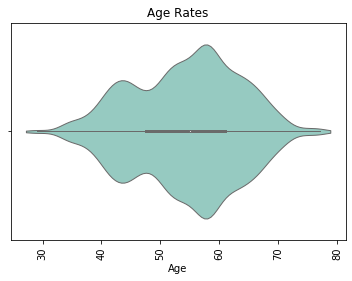

In [29]:
sns.violinplot(data.Age, palette="Set3", bw=.2,cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Age Rates")
plt.show()

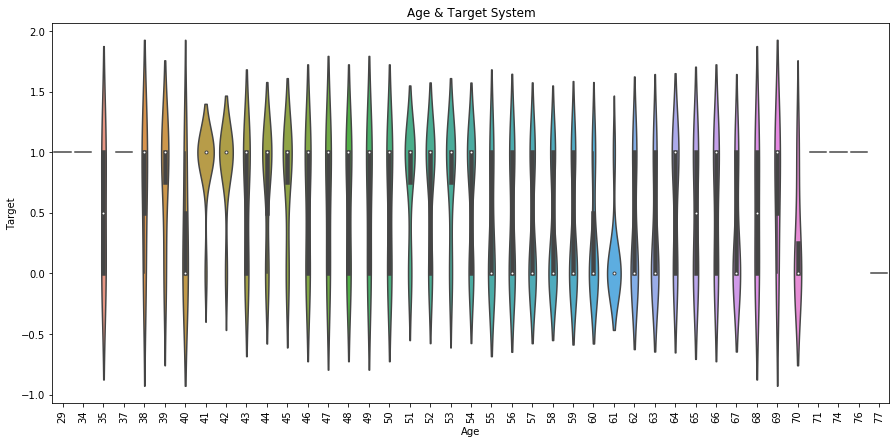

In [30]:
plt.figure(figsize=(15,7))
sns.violinplot(x=data.Age, y=data.Target)
plt.xticks(rotation=90)
plt.title("Age & Target System")
plt.show()

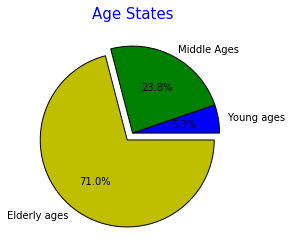

In [31]:
colors=['b','g','y']
slices=[len(young_ages),len(middle_ages),len(elderly_ages)]
explode=[0,0,0.1]
labels=['Young ages','Middle Ages','Elderly ages']
plt.pie(slices,labels=labels,colors=colors,explode=explode,wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

In [32]:
data.Sex.value_counts()

1    207
0     96
Name: Sex, dtype: int64

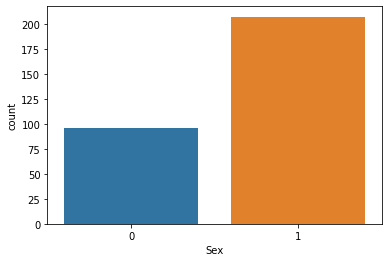

In [33]:
#Sex (1 = male; 0 = female)
sns.countplot(data.Sex)
plt.show()

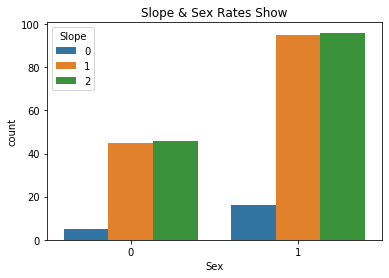

In [34]:
sns.countplot(data.Sex,hue=data.Slope)
plt.title('Slope & Sex Rates Show')
plt.show()

In [35]:
total_genders_count=len(data.Sex)
male_count=len(data[data['Sex']==1])
female_count=len(data[data['Sex']==0])
print('Total Genders:',total_genders_count)
print('Male Count:',male_count)
print('Female Count:',female_count)

Total Genders: 303
Male Count: 207
Female Count: 96


In [36]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 68.32%
Female State: 31.68%


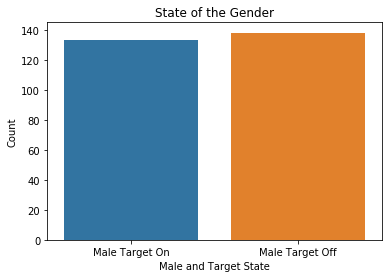

In [37]:
#Male State & target 1 & 0
male_andtarget_on = (len(data[data['Sex']==1])&(len(data[data['Target']==1])))
male_andtarget_off = (len(data[data['Sex']==1])&(len(data[data['Target']==0])))
sns.barplot(x=['Male Target On','Male Target Off'], y = [male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

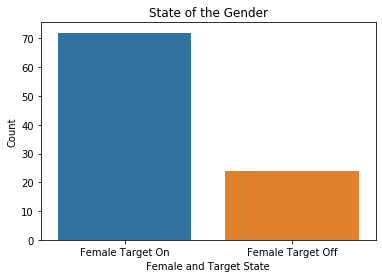

In [38]:
#Female State & target 1 & 0
female_andtarget_on=len(data[(data.Sex==0)&(data['Target']==1)])
female_andtarget_off=len(data[(data.Sex==0)&(data['Target']==0)])
####
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

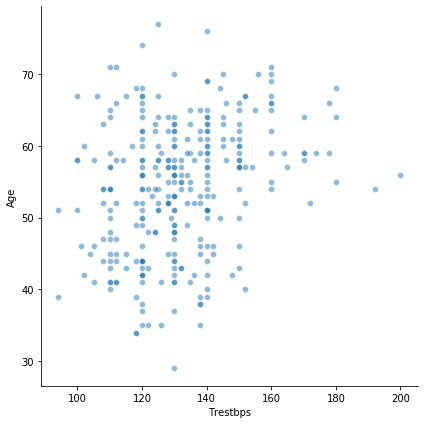

In [39]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x='Trestbps', y='Age', sizes=(40, 400), alpha=0.5,palette="muted", height=6
            ,data=data)

In [40]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


Chest Pain Type Analysis


In [41]:
data.Cp.value_counts()

0    143
2     87
1     50
3     23
Name: Cp, dtype: int64

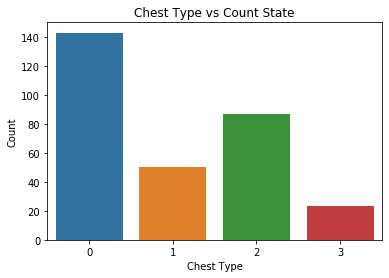

In [42]:
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad
sns.countplot(data.Cp, data=data)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()

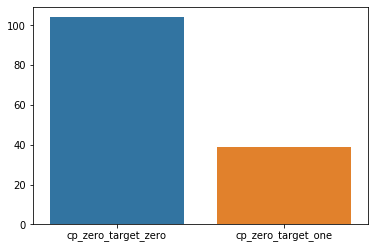

In [43]:
cp_zero_target_zero=len(data[(data.Cp==0)&(data.Target==0)])
cp_zero_target_one=len(data[(data.Cp==0)&(data.Target==1)])
sns.barplot(x=['cp_zero_target_zero','cp_zero_target_one'], y=[cp_zero_target_zero,cp_zero_target_one])
plt.show()

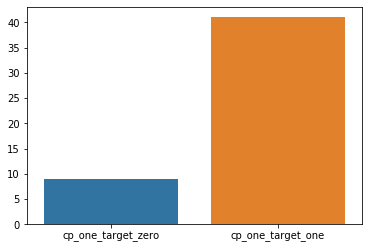

In [44]:
cp_one_target_zero = len(data[(data.Cp==1)&(data.Target==0)])
cp_one_target_one = len(data[(data.Cp==1)&(data.Target==1)])
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'], y=[cp_one_target_zero,cp_one_target_one])
plt.show()

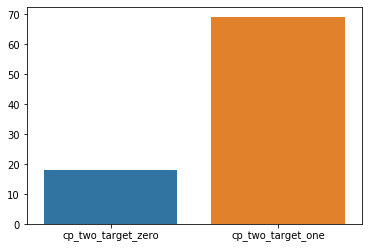

In [45]:
cp_two_target_zero=len(data[(data.Cp==2)&(data.Target==0)])
cp_two_target_one=len(data[(data.Cp==2)&(data.Target==1)])
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

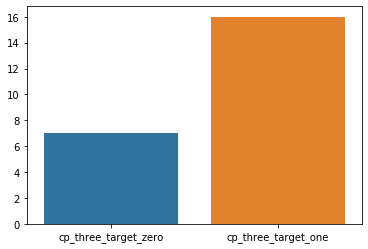

In [46]:
cp_three_target_zero=len(data[(data.Cp==3)&(data.Target==0)])
cp_three_target_one=len(data[(data.Cp==3)&(data.Target==1)])
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()


In [47]:
data.head(1)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2


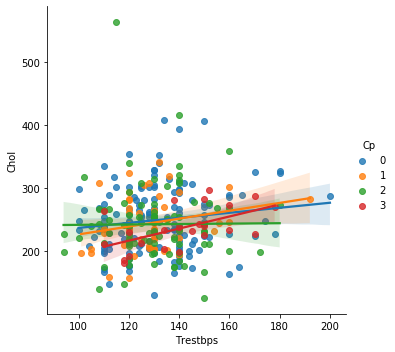

In [48]:
# Show the results of a linear regression within each dataset
sns.lmplot(x='Trestbps', y='Chol', hue='Cp',data=data)

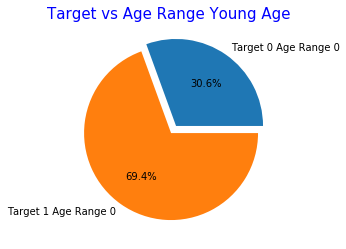

In [49]:
target_0_agerang_0 = len(data[(data.Target==0)&(data.AgeRange==1)])
target_1_agerang_0 = len(data[(data.Target==1)&(data.AgeRange==1)])
slices=[target_0_agerang_0,target_1_agerang_0]
labels=['Target 0 Age Range 0','Target 1 Age Range 0']
explode=[0.1,0]
plt.pie(slices,labels=labels,explode=explode, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()

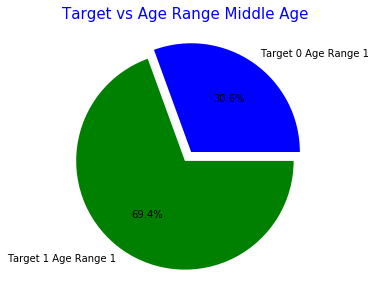

In [50]:
target_0_agerang_1=len(data[(data.Target==0)&(data.AgeRange==1)])
target_1_agerang_1=len(data[(data.Target==1)&(data.AgeRange==1)])
colors = ['blue','green']
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()

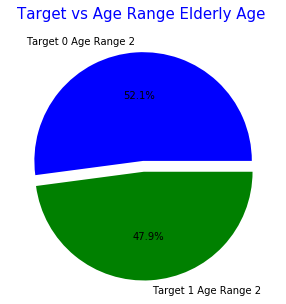

In [51]:
target_0_agerang_2=len(data[(data.Target==0)&(data.AgeRange==2)])
target_1_agerang_2=len(data[(data.Target==1)&(data.AgeRange==2)])
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0 Age Range 2','Target 1 Age Range 2'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

Thalach Analysis


In [52]:
#The analysis of the system we discussed in the case of maximum heart rate is shown.
data_thalach_count=data.Thalach.value_counts()[:20]
data_thalach_count
#First show 20 rows


162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: Thalach, dtype: int64

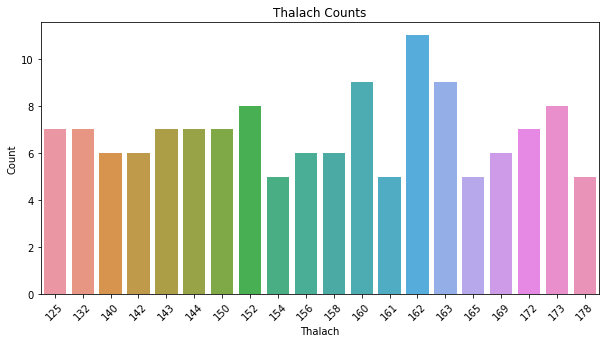

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x=data.Thalach.value_counts()[:20].index,y=data.Thalach.value_counts()[:20].values,data=data)
plt.xticks(rotation=45)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.show()

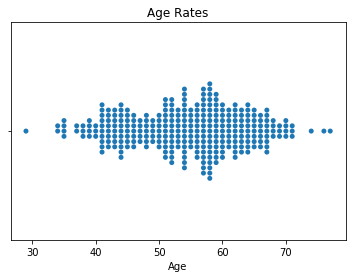

In [54]:
sns.swarmplot(x=data.Age)
plt.title('Age Rates')
plt.show()

In [55]:
age_unique=sorted(data.Age.unique())
age_thalach_values=data.groupby('Age')['Thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['Age']==age].Thalach)/age_thalach_values[i])

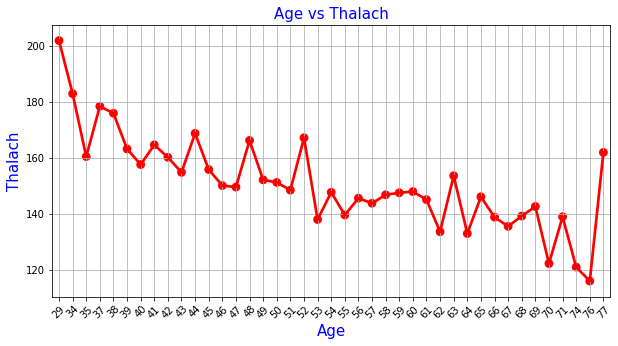

In [56]:
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique, y = mean_thalach, data=data, color='red',alpha=0.8)
plt.xlabel('Age', color='blue', fontsize=15)
plt.ylabel('Thalach', color='blue', fontsize=15)
plt.title('Age vs Thalach', color='blue', fontsize=15)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [57]:
age_range_thalach=data.groupby('AgeRange')['Thalach'].mean()

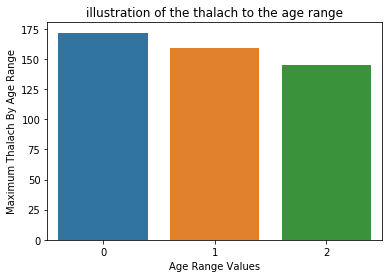

In [58]:
sns.barplot(x=age_range_thalach.index, y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

In [59]:
cp_thalach=data.groupby('Cp')['Thalach'].mean()

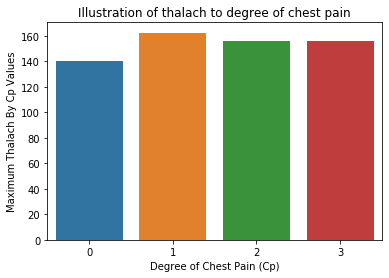

In [60]:
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()
#As seen in this graph, it is seen that the heart rate is less 
#when the chest pain is low. But in cases where chest pain is 
#1, it is observed that the area is more. 2 and 3 were found to 
#be of the same degree.

Thal Analysis

In [61]:
data['Thal'].value_counts()

2    166
3    117
1     18
0      2
Name: Thal, dtype: int64

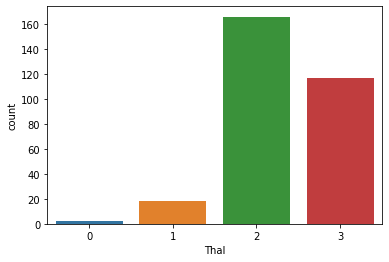

In [62]:
sns.countplot(data.Thal, data=data)

In [63]:
data[data['Thal']==0]

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,2
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,2


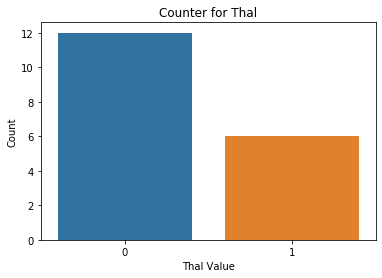

In [64]:
data[data['Thal']==1].Target.value_counts()
sns.barplot(x=data[data['Thal']==1].Target.value_counts().index, \
            y=data[data['Thal']==1].Target.value_counts().values)
plt.xlabel('Thal Value')
plt.ylabel('Count')
plt.title('Counter for Thal')
plt.show()

In [65]:
#Target 1
target_1_thal_0=len(data[(data['Target']==1)&(data['Thal']==0)])
target_1_thal_1=len(data[(data['Target']==1)&(data['Thal']==1)])
target_1_thal_2=len(data[(data['Target']==1)&(data['Thal']==2)])
target_1_thal_3=len(data[(data['Target']==1)&(data['Thal']==3)])
print('Target 1 Thal 0:', target_1_thal_0)
print('Target 1 Thal 1:', target_1_thal_1)
print('Target 1 Thal 2:', target_1_thal_2)
print('Target 1 Thal 3:', target_1_thal_3)

print('*'*50)
#Target 0
target_0_thal_0=len(data[(data['Target']==0)&(data['Thal']==0)])
target_0_thal_1=len(data[(data['Target']==0)&(data['Thal']==1)])
target_0_thal_2=len(data[(data['Target']==0)&(data['Thal']==2)])
target_0_thal_3=len(data[(data['Target']==0)&(data['Thal']==3)])
print('Target 0 Thal 0:', target_0_thal_0)
print('Target 0 Thal 1:', target_0_thal_1)
print('Target 0 Thal 2:', target_0_thal_2)
print('Target 0 Thal 3:', target_0_thal_3)

Target 1 Thal 0: 1
Target 1 Thal 1: 6
Target 1 Thal 2: 130
Target 1 Thal 3: 28
**************************************************
Target 0 Thal 0: 1
Target 0 Thal 1: 12
Target 0 Thal 2: 36
Target 0 Thal 3: 89


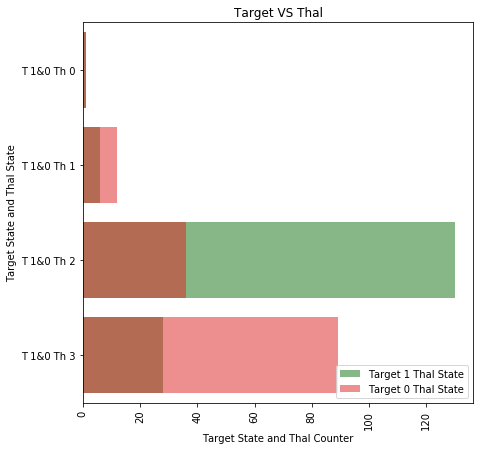

In [66]:
f, ax = plt.subplots(figsize=(7,7))
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1', 'T 1&0 Th 2', 'T 1&0 Th 3'],\
           x=[1,6,130,28], label='Target 1 Thal State',color='green', alpha=0.5)
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1', 'T 1&0 Th 2', 'T 1&0 Th 3'],\
           x=[1,12,36,89], label='Target 0 Thal State', color='red',alpha=0.5)
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Target State and Thal Counter',ylabel='Target State and Thal State',title='Target VS Thal')
plt.xticks(rotation=90)
plt.show()

In [68]:
data.Target.value_counts()

1    165
0    138
Name: Target, dtype: int64

In [69]:
data.Target.unique()

array([1, 0], dtype=int64)

AttributeError: 'Text' object has no property 'fonsize'

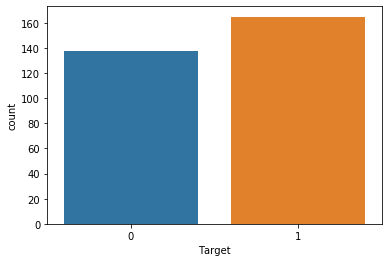

In [75]:
sns.countplot(data.Target, data=data)
plt.xlabel('Target', fonsize=10, color='blue')
plt.ylabel('Count', fontsize=10, color='blue')
plt.title('TargetCounter 1&0 ', fontsize=10, color='blue')
plt.show()